# Import af data

In [609]:
from tqdm import tqdm_notebook as tqdm # Module for tracking progress. conda install -c conda-forge tqdm
import json
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import json
from afinn import Afinn
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter


df = pd.read_csv (r'C:\Users\Saxen\Documents\Polit\Social Data Science\Trustpilot\Trustpilot_data.csv')
df.head()

,Unnamed: 0,website,name,review,rating
0,0,WWW.SAXO.COM,INGRID NIELSEN,Fin betjening,5 stjerner: Fremragende
1,1,WWW.SAXO.COM,Casper Sand Christiansen,God oplevelse - hver eneste gang!,5 stjerner: Fremragende
2,2,WWW.SAXO.COM,Gitte Zankl Høyer,Det var nemt at bestille og leveringen var vir...,5 stjerner: Fremragende
3,3,WWW.SAXO.COM,Anna Olesen,Nemt at bestille og hurtig levering. Har besti...,5 stjerner: Fremragende
4,4,WWW.SAXO.COM,Elisabeth RAVN,Har I mange år købt den ene dejlige oplevelse ...,5 stjerner: Fremragende


In [610]:
df['rating_n'] = df['rating'].str.extract('(\d+)')

In [611]:
df_cc = pd.DataFrame(df.name.str.split(' ',1).tolist(), columns = ['first_name','surname'])

df['first_name'] = df_cc['first_name']
df['surname'] = df_cc['surname']
df.head()
column_names =['website', 'first_name', 'surname', 'name', 'review', 'rating', 'rating_n']
df=df[column_names]
df.head()
df.count()

website       19985
first_name    19985
surname       13525
name          19985
review        19985
rating        19985
rating_n      19985
dtype: int64

In [612]:
df['first_name'] = df['first_name'].str.lower()

# Henter Navne fil

In [613]:
df_names = pd.read_excel (r'/Users/Saxen/Documents/Polit/Social Data Science/Trustpilot/Navne.xlsx')
# d for dreng, p for pige og u for unisex


In [614]:
df_names['first_name'] = df_names['first_name'].str.lower()

# Merger Navne df med data df

In [615]:
df_names2 = pd.merge(df, df_names, on='first_name', how='left')

In [616]:
#Finds the number of male and female names
print('Males: ' + str(sum(df_names2.Gender == 'd')),'\n', 'Females: ' + str(sum(df_names2.Gender == 'p')))

Males: 8246 
 Females: 9725


In [617]:
df_names2.count()

website       19985
first_name    19985
surname       13525
name          19985
review        19985
rating        19985
rating_n      19985
Gender        17971
dtype: int64

In [618]:
#df_names2.head()
del df_names2['rating']
del df_names2['name']
#df_names2['review'] = df_names2['review'].str.lower()

In [619]:
df_names2['rating_n'] = pd.to_numeric(df_names2['rating_n'])

In [620]:
#Renser data for rating_n=0
sort_rating = df_names2['rating_n']>0

df_sort_rating = df_names2[sort_rating]
df_names2 = df_sort_rating 

In [621]:
df_names2[df_names2.isin(['0'])].dropna(how='all').count()

website       0
first_name    0
surname       0
review        0
rating_n      0
Gender        0
dtype: int64

In [622]:
#Fjerner Gender = NaN
df_names2 = df_names2[pd.notnull(df_names2['Gender'])]

# Afinn

In [623]:
#Original Afinn ordbog
afinn = Afinn(language='da',emoticons=True)

afinn_dict = afinn
df_Afinn = df_names2
df_Afinn['Afinn'] = df_Afinn.review.apply(afinn.score)


C:\Users\Saxen\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [624]:
def word_count(text_string):
    return len(text_string.split())

In [625]:
df_Afinn['word count'] = df_Afinn['review'].apply(word_count)
df_Afinn['relativ_afinn'] = df_Afinn['Afinn'] / df_Afinn['word count']*100
df_Afinn.head()

C:\Users\Saxen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Saxen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,website,first_name,surname,review,rating_n,Gender,Afinn,word count,relativ_afinn
0,WWW.SAXO.COM,ingrid,NIELSEN,Fin betjening,5,p,4.0,2,200.000000
1,WWW.SAXO.COM,casper,Sand Christiansen,God oplevelse - hver eneste gang!,5,d,25.0,6,416.666667
2,WWW.SAXO.COM,gitte,Zankl Høyer,Det var nemt at bestille og leveringen var vir...,5,p,75.0,12,625.000000
3,WWW.SAXO.COM,anna,Olesen,Nemt at bestille og hurtig levering. Har besti...,5,p,75.0,17,441.176471
4,WWW.SAXO.COM,elisabeth,RAVN,Har I mange år købt den ene dejlige oplevelse ...,5,p,0.0,22,0.000000


C:\Users\Saxen\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Saxen\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Saxen\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


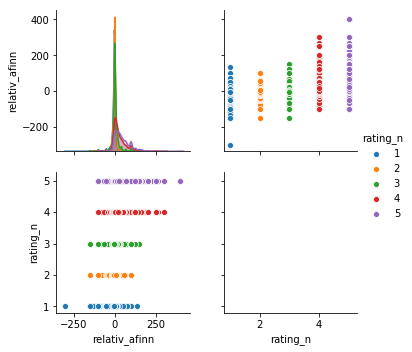

In [486]:
#Original Afinn
# define columns
sentiment_columns = ['relativ_afinn']
hue = 'rating_n'
sns.pairplot(df_Afinn.sample(17000)[['relativ_afinn']+[hue]], hue=hue)



# Adjusted Afinn

In [489]:
#Adjusted Afinn ordbog
#Her er sættes ordets værdi i anden ^2.
afinn = Afinn(language='da',emoticons=True)

afinn_dict = afinn
df_Afinn = df_names2
df_Afinn['Afinn_adj'] = df_Afinn.review.apply(afinn.score)

C:\Users\Saxen\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [497]:
# For at få den justerede Afinn ordbog til at virke, så skal man sætte indholdet fra den justerede ordbog ind i den originale
#og herefter køre nedstående kode. For at få den originale ordbog tilbage, så skal man igen ombytte filerne og køre koden igen.
afinn = Afinn(language='da',emoticons=True)

df_Afinn = df_names2
df_Afinn['Afinn_adj'] = df_Afinn.review.apply(afinn.score)

df_Afinn['relativ_afinn_adj'] = df_Afinn['Afinn_adj'] / df_Afinn['word count']*100

C:\Users\Saxen\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Saxen\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


C:\Users\Saxen\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Saxen\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Saxen\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


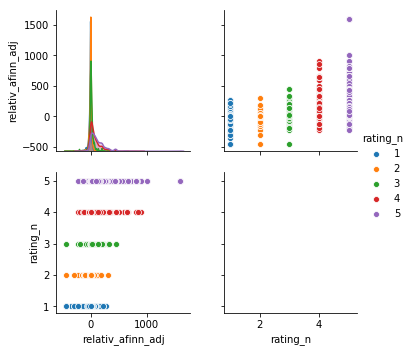

In [498]:
#define columns
sentiment_columns = ['relativ_afinn_adj']
hue = 'rating_n'
sns.pairplot(df_Afinn.sample(17000)[['relativ_afinn_adj']+[hue]], hue=hue)


# Adjusted Afinn 2

In [510]:
#Her er bruges kvadratroden af ordnes værdi og der divideres senere med mængden af ord fra afinn i hvert review.
df_Afinn['Afinn_relativ_adj2'] = df_Afinn['Afinn_adj'] / df_Afinn['Afinn_dict']*100

C:\Users\Saxen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


C:\Users\Saxen\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Saxen\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Saxen\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Saxen\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Saxen\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


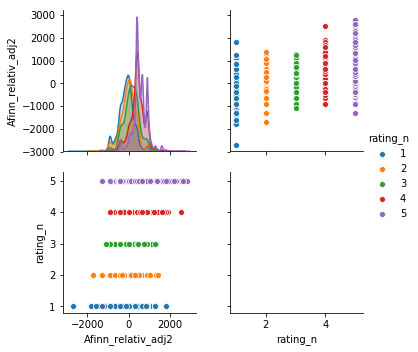

In [511]:
sentiment_columns = ['Afinn_relativ_adj2']
hue = 'rating_n'
sns.pairplot(df_Afinn.sample(17000)[['Afinn_relativ_adj2']+[hue]], hue=hue)


# Adjusted Afinn 3

In [506]:
df_Afinn.head()

,website,first_name,surname,review,rating_n,Gender,Afinn,word count,relativ_afinn,Afinn_adj,...,upper_words,exclamation,dot,cuss,no_DSB_review,Afinn_relativ_adj,Afinn_relativ_adj2,Afinn_adj2,Afinn_adj3,relativ_afinn_adj3
0,WWW.SAXO.COM,ingrid,NIELSEN,Fin betjening,5,p,2.0,2,100.000000,4.0,...,0,0,0,0,Fin betjening,400.0,400.0,4.0,4.0,200.000000
1,WWW.SAXO.COM,casper,Sand Christiansen,God oplevelse - hver eneste gang!,5,d,3.0,6,50.000000,9.0,...,0,1,0,0,God oplevelse - hver eneste gang!,900.0,900.0,25.0,25.0,833.333333
2,WWW.SAXO.COM,gitte,Zankl Høyer,Det var nemt at bestille og leveringen var vir...,5,p,5.0,12,41.666667,14.0,...,0,0,0,0,Det var nemt at bestille og leveringen var vir...,700.0,700.0,75.0,75.0,1500.000000
3,WWW.SAXO.COM,anna,Olesen,Nemt at bestille og hurtig levering. Har besti...,5,p,2.0,17,11.764706,5.0,...,0,0,0,0,Nemt at bestille og hurtig levering. Har besti...,500.0,500.0,75.0,75.0,3750.000000
4,WWW.SAXO.COM,elisabeth,RAVN,Har I mange år købt den ene dejlige oplevelse ...,5,p,0.0,22,0.000000,0.0,...,1,0,0,0,Har I mange år købt den ene dejlige oplevelse ...,NaN,NaN,0.0,0.0,NaN


In [514]:
#adj 2, værdier^2 og de positive og negative ord blandt de 500 mest brugte har fået +/- 5
# define columns
afinn = Afinn(language='da',emoticons=True)

afinn_dict = afinn
df_Afinn = df_names2
df_Afinn['Afinn_adj3'] = df_Afinn.review.apply(afinn.score)

C:\Users\Saxen\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [515]:
# For at få den justerede Afinn ordbog til at virke, så skal man sætte indholdet fra den justerede ordbog ind i den originale
#og herefter køre nedstående kode. For at få den originale ordbog tilbage, så skal man igen ombytte filerne og køre koden igen.
# Forskel fra adjusted 2 er, at her divederes der kun med ord, som indgår i afinn. 

df_Afinn['relativ_afinn_adj3'] = df_Afinn['Afinn_adj3'] / df_Afinn['Afinn_dict']*100


C:\Users\Saxen\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


C:\Users\Saxen\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Saxen\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Saxen\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Saxen\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Saxen\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


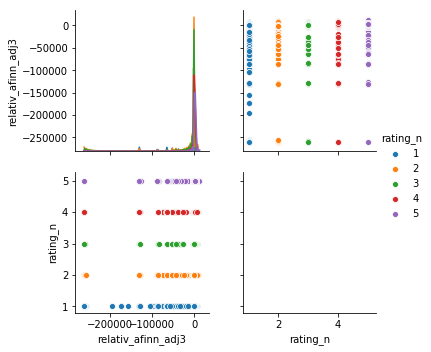

In [516]:
#adj 3
# define columns
sentiment_columns = ['relativ_afinn_adj3']
hue = 'rating_n'
sns.pairplot(df_Afinn.sample(17000)[['relativ_afinn_adj3']+[hue]], hue=hue)


In [626]:
#Antal NaN i gender
df_Afinn.isnull()
df_Afinn.isnull().sum()

website             0
first_name          0
surname          5136
review              0
rating_n            0
Gender              0
Afinn               0
word count          0
relativ_afinn       0
dtype: int64

# Tekstanalyse

In [627]:
#Laver en kolonne til at tælle store bogstaver og exclamatins
def uppercase(text_string):
    upper_w = 0
    for word in text_string.split():
        upper_w += word.isupper()
    return upper_w

df_Afinn['upper_words'] = df_Afinn['review'].apply(uppercase)

def exclamation_n(text_string):
    exclamation = 0
    for rev in text_string:
        exclamation = len(re.findall('!', text_string))
    return exclamation
df_Afinn['exclamation'] = df_Afinn['review'].apply(exclamation_n)

def dotdotdot(text_string):
    dotdotdot_count = 0
    for rev in text_string:
        dotdotdot_count = len(re.findall('\.\.\.', text_string))
    return dotdotdot_count

df_Afinn['dot'] = df_Afinn['review'].apply(dotdotdot)

cuss_list = [r'((?i)(fuck)+)', r'((?i)(fuc\*)+)', r'((?i)(fuc\.)+)', r'((?i)(f\*\*\*)+)', r'((?i)(f\.\.\.)+)', r'((?i)(f\.\.k)+)', r'((?i)(f\*\*k)+)', r'((?i)(lort)+)', r'((?i)(l\*\*t)+)', r'((?i)(l\*\*\*)+)', r'((?i)(l\.\.\.)+)', r'((?i)(l\.\.t)+)', r'((?i)(lor\.)+)', r'((?i)(lor\*)+)']

def cuss_words(text_string):
    cuss = 0
    for word in cuss_list:
        cuss += len(re.findall(word, text_string))
    return cuss

df_Afinn['cuss'] = df_Afinn['review'].apply(cuss_words)

def excl_DSB(text_string):
    for x in text_string:
        no_dsb = text_string.replace('DSB', '')
    return no_dsb

df_Afinn['no_DSB_review'] = df_Afinn['review'].apply(excl_DSB)

df_Afinn.sample(10)

C:\Users\Saxen\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Saxen\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\Saxen\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,website,first_name,surname,review,rating_n,Gender,Afinn,word count,relativ_afinn,upper_words,exclamation,dot,cuss,no_DSB_review
4189,WWW.NEMLIG.COM,kirsten,Nørgaard,Varer leveret punktligt til døren.Alle varer f...,5,p,54.0,17,317.647059,1,0,0,0,Varer leveret punktligt til døren.Alle varer f...
1156,WWW.SAXO.COM,tina,None,Fin informationsstrøm fra ordre til levering,5,p,29.0,6,483.333333,0,0,0,0,Fin informationsstrøm fra ordre til levering
6276,WWW.BILKA.DK,anders,Mikkelsen,Fik god og tålmodig vejledning 👍👍,4,d,33.0,6,550.000000,0,0,0,0,Fik god og tålmodig vejledning 👍👍
13890,WWW.WUPTI.COM,kim,None,Har bestilt en printer og aftalt leveringssted...,1,d,-2575.0,38,-6776.315789,0,4,0,0,Har bestilt en printer og aftalt leveringssted...
17437,SWEETDEAL.DK,charlotte,Kragh Christensen,Har aldrig oplevet problemer med deals købt he...,5,p,-25.0,9,-277.777778,0,0,0,0,Har aldrig oplevet problemer med deals købt he...
7680,WWW.BILKA.DK,mia,None,Nemt og hurtigt. Bestilte til afhentning i Sen...,5,p,75.0,20,375.000000,0,0,0,0,Nemt og hurtigt. Bestilte til afhentning i Sen...
9513,SHOPPING.COOP.DK,niels,Lovman Hjortsø,Havde fortrudt mit køb af cykel. Kørte til coo...,5,d,-13.0,36,-36.111111,0,0,0,0,Havde fortrudt mit køb af cykel. Kørte til coo...
2215,WWW.ELGIGANTEN.DK,ann,None,Fine priser. Men meget langsom forsendelse.Det...,3,p,4.0,29,13.793103,0,0,1,0,Fine priser. Men meget langsom forsendelse.Det...
15773,WWW.BOOZT.COM,preben,Vridstoft,Lynhurtig levering,5,d,25.0,2,1250.000000,0,0,0,0,Lynhurtig levering
1994,WWW.SAXO.COM,lis,Olsen,Super hurtig og let måde at købe bøger på,5,p,51.0,9,566.666667,0,0,0,0,Super hurtig og let måde at købe bøger på


# Opdeling af data på køn

(0, 4.499051920575957)

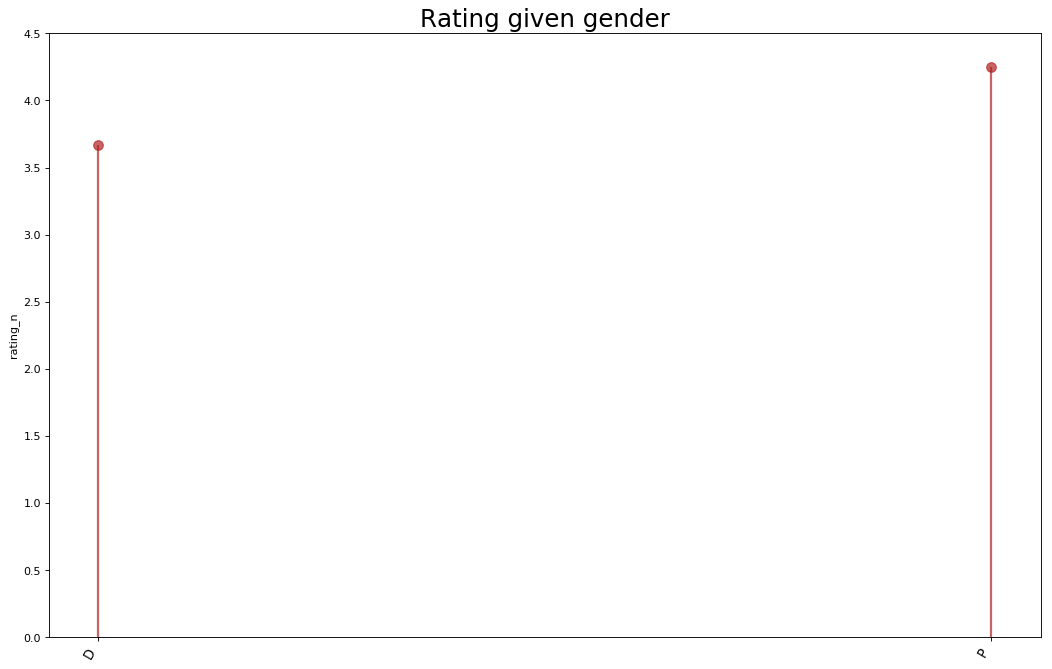

In [628]:
df = df_Afinn[['rating_n', 'Gender']].groupby('Gender').apply(lambda x: x.mean())
df.sort_values('rating_n', inplace=True)
df.reset_index(inplace=True)
# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df.rating_n, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=df.index, y=df.rating_n, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Rating given gender', fontdict={'size':22})
ax.set_ylabel('rating_n')
ax.set_xticks(df.index)
ax.set_xticklabels(df.Gender.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, )

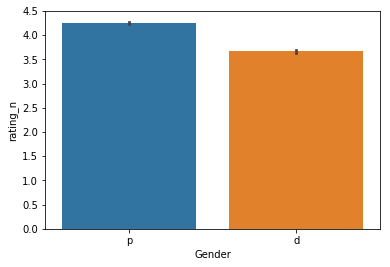

In [629]:
sns.barplot(x='Gender', y='rating_n', data=df_Afinn)

In [576]:
df_Afinn.loc[df_Afinn['Gender']=='d', ['rating_n']].count()

rating_n    8237
dtype: int64

In [572]:
df_Afinn.loc[df_Afinn['Gender']=='p', ['rating_n']].count()

rating_n    9722
dtype: int64

In [573]:
df_Afinn.loc[df_Afinn['rating_n']==1, ['Gender', 'rating_n']].count()

Gender      3015
rating_n    3015
dtype: int64

In [557]:
df_Afinn.loc[df_Afinn['rating_n']==2, ['Gender', 'rating_n']].count()

Gender      764
rating_n    764
dtype: int64

In [559]:
df_Afinn.loc[df_Afinn['rating_n']==3, ['Gender', 'rating_n']].count()

Gender      794
rating_n    794
dtype: int64

In [560]:
df_Afinn.loc[df_Afinn['rating_n']==4, ['Gender', 'rating_n']].count()

Gender      2302
rating_n    2302
dtype: int64

In [561]:
df_Afinn.loc[df_Afinn['rating_n']==5, ['Gender', 'rating_n']].count()

Gender      11084
rating_n    11084
dtype: int64

In [562]:
df_Afinn.loc[df_Afinn['rating_n']<6, ['Gender', 'rating_n']].count()

Gender      17959
rating_n    17959
dtype: int64

In [630]:
#Dataframe med Gender=d
sort_male = df_Afinn['Gender']== 'd'

df_sort_male = df_Afinn[sort_male]
print(df_sort_male.shape)
df_sort_male.sample(50)

(8237, 14)


,website,first_name,surname,review,rating_n,Gender,Afinn,word count,relativ_afinn,upper_words,exclamation,dot,cuss,no_DSB_review
7204,WWW.BILKA.DK,karsten,None,Ufuldstændig varebeskrivelse. Bøvlet reklamat...,1,d,-4.0,24,-16.666667,0,0,0,0,Ufuldstændig varebeskrivelse. Bøvlet reklamat...
5246,WWW.NEMLIG.COM,jesper,Thomsen,Jeg køber det næste alt vores mad hos nemlig.c...,5,d,-3.0,49,-6.122449,0,0,2,0,Jeg køber det næste alt vores mad hos nemlig.c...
10602,WWW.DSB.DK,leo,Lolholm Nielsen,Hej jule glæden vil ingen ende tage.374 kr for...,1,d,7.0,61,11.475410,1,0,0,0,Hej jule glæden vil ingen ende tage.374 kr for...
19735,WWW.JUST-EAT.DK,bobby,Joe Hart,Super godt 👍,5,d,50.0,3,1666.666667,0,0,0,0,Super godt 👍
14483,WWW.BOOZT.COM,poul,Jensen,Det er nemt og hurtig Desværre passede de vare...,5,d,46.0,13,353.846154,0,0,0,0,Det er nemt og hurtig Desværre passede de vare...
12080,WWW.WUPTI.COM,claus,johansen,"Har lige en brugt iphone 6,Det gør jeg ikke ig...",1,d,29.0,34,85.294118,0,0,0,0,"Har lige en brugt iphone 6,Det gør jeg ikke ig..."
11610,WWW.DSB.DK,arne,Graversen,Jeg sad for nyligt i DSB's InterCityLyn mod Aa...,5,d,-1.0,166,-0.602410,1,1,0,0,Jeg sad for nyligt i 's InterCityLyn mod Aalbo...
11964,WWW.DSB.DK,magnus,Sølvhøi Nielsen,Ingen grund til ikke at skulle bestille billet...,5,d,0.0,17,0.000000,0,0,0,0,Ingen grund til ikke at skulle bestille billet...
16117,SWEETDEAL.DK,lars,Munksgaard,har nu prøvet at afmelde nyheds mailene (spam...,2,d,-4.0,16,-25.000000,0,1,0,0,har nu prøvet at afmelde nyheds mailene (spam...
11449,WWW.DSB.DK,lille,And,Den første store efterårsstorm kom lidt bag på...,3,d,5.0,100,5.000000,0,0,4,0,Den første store efterårsstorm kom lidt bag på...


In [632]:
#Dataframe med Gender=p
sort_ratin_n = df_Afinn['rating_n']< 3

df_sort_ratin_n = df_Afinn[sort_ratin_n]
print(df_sort_ratin_n.shape)
df_sort_ratin_n.sample(50)

(3779, 14)


,website,first_name,surname,review,rating_n,Gender,Afinn,word count,relativ_afinn,upper_words,exclamation,dot,cuss,no_DSB_review
2129,WWW.ELGIGANTEN.DK,erling,Johansen,Outlet udgaven af samsung a70 virker ikke helt...,2,d,-8.0,53,-15.094340,0,0,0,0,Outlet udgaven af samsung a70 virker ikke helt...
10677,WWW.DSB.DK,nicholai,Kjærgaard,Skal i tide og utide leve med aflyste / forsin...,1,d,-4.0,46,-8.695652,0,0,0,0,Skal i tide og utide leve med aflyste / forsin...
13308,WWW.WUPTI.COM,bo,Wellemann,Jeg har aldrig oplevet at et firma river en va...,1,d,0.0,42,0.000000,0,0,0,0,Jeg har aldrig oplevet at et firma river en va...
11254,WWW.DSB.DK,kristine,None,Jeg pendler hver dag imellem Slagelse og Køben...,1,p,8.0,281,2.846975,7,0,0,0,Jeg pendler hver dag imellem Slagelse og Køben...
11932,WWW.DSB.DK,sebastian,Villefrance,Hvor har jeg dog -aldrig- i mine 28 år haft en...,2,d,30.0,444,6.756757,2,0,2,0,Hvor har jeg dog -aldrig- i mine 28 år haft en...
16117,SWEETDEAL.DK,lars,Munksgaard,har nu prøvet at afmelde nyheds mailene (spam...,2,d,-4.0,16,-25.000000,0,1,0,0,har nu prøvet at afmelde nyheds mailene (spam...
10810,WWW.DSB.DK,benjamin,Alexander Delgado,"Det er mig ubegribeligt, nu har jeg den sidste...",1,d,9.0,68,13.235294,11,0,0,0,"Det er mig ubegribeligt, nu har jeg den sidste..."
10249,WWW.DSB.DK,anton,Rømer,Ja så..... billetautomaterne virkede ikke før ...,1,d,5.0,18,27.777778,0,0,1,0,Ja så..... billetautomaterne virkede ikke før ...
16941,SWEETDEAL.DK,søren,None,Skal betale X gange levering når man bestiller...,2,d,50.0,17,294.117647,1,0,0,0,Skal betale X gange levering når man bestiller...
9071,SHOPPING.COOP.DK,lars,Munk Svit,"Vi købte 2 sol senge, den ene manglede alt til...",1,d,9.0,58,15.517241,0,0,0,0,"Vi købte 2 sol senge, den ene manglede alt til..."


In [633]:
df_Afinn.count()

website          17959
first_name       17959
surname          12823
review           17959
rating_n         17959
Gender           17959
Afinn            17959
word count       17959
relativ_afinn    17959
upper_words      17959
exclamation      17959
dot              17959
cuss             17959
no_DSB_review    17959
dtype: int64

In [634]:
#Dataframe med Gender=p
sort_female = df_Afinn['Gender']== 'p'

df_sort_female = df_Afinn[sort_female]
print(df_sort_female.shape)
df_sort_female.sample(50)

(9722, 14)


,website,first_name,surname,review,rating_n,Gender,Afinn,word count,relativ_afinn,upper_words,exclamation,dot,cuss,no_DSB_review
18947,WWW.JUST-EAT.DK,laila,Elisabeth Thorsen,Nemt og hurtigt,5,p,50.0,3,1666.666667,0,0,0,0,Nemt og hurtigt
8030,SHOPPING.COOP.DK,anette,Lausten,"FØLER OS VIRKELIG TAGET VED ""næsen""SPAR op til...",2,p,-5.0,180,-2.777778,13,8,0,0,"FØLER OS VIRKELIG TAGET VED ""næsen""SPAR op til..."
7343,WWW.BILKA.DK,laila,None,Hurtig service. Dejligt at der er mulighed for...,5,p,29.0,14,207.142857,0,0,0,0,Hurtig service. Dejligt at der er mulighed for...
13089,WWW.WUPTI.COM,claudia,Thomsen,Nemt at bestille og kun en dag levering. Super...,5,p,100.0,10,1000.000000,0,0,0,0,Nemt at bestille og kun en dag levering. Super...
9301,SHOPPING.COOP.DK,christa,Astrup Sørensen,Hurtigt Og effektivt Varer svarer til forventning,5,p,29.0,7,414.285714,0,0,0,0,Hurtigt Og effektivt Varer svarer til forventning
693,WWW.SAXO.COM,hannah,Vig,Jeg har været tilmeldt Saxo premium i to måned...,5,p,116.0,77,150.649351,0,1,0,0,Jeg har været tilmeldt Saxo premium i to måned...
7695,WWW.BILKA.DK,kirsten,Schneider,"Alt perfekt, hurtig levering",5,p,75.0,4,1875.000000,0,0,0,0,"Alt perfekt, hurtig levering"
5899,WWW.NEMLIG.COM,mia,Gistrup,Super dejlig måde at købe ind på,5,p,50.0,7,714.285714,0,0,0,0,Super dejlig måde at købe ind på
5791,WWW.NEMLIG.COM,birgitte,Devald,Meget tilfreds fin service 😀🥕🍆🍅🌻😎😄😄😄,5,p,8.0,5,160.000000,0,0,0,0,Meget tilfreds fin service 😀🥕🍆🍅🌻😎😄😄😄
14570,WWW.BOOZT.COM,charlotte,None,Hurtig levering. Nem retur.,5,p,50.0,4,1250.000000,0,0,0,0,Hurtig levering. Nem retur.


In [635]:
check = df_Afinn.duplicated(subset='Gender', keep='first')

In [636]:
#Antal NaN i gender
df_Afinn.isnull()
df_Afinn.isnull().sum()

website             0
first_name          0
surname          5136
review              0
rating_n            0
Gender              0
Afinn               0
word count          0
relativ_afinn       0
upper_words         0
exclamation         0
dot                 0
cuss                0
no_DSB_review       0
dtype: int64

In [637]:
#Original Afinn
df_Afinn.groupby(['Gender', 'rating_n'])['relativ_afinn'].describe()

count         mean          std            min         25%  \
Gender rating_n                                                                
d      1         1913.0 -1111.274322  6450.713526 -130050.000000  -30.985915   
       2          467.0  -775.698986  3574.299895  -37157.142857  -18.541667   
       3          407.0  -125.335502  1321.775062  -16100.000000    0.000000   
       4         1096.0   172.762319  2454.911244  -65025.000000   11.632518   
       5         4354.0   522.275890   686.065970  -12955.000000   57.142857   
p      1         1102.0 -1090.320437  3733.449749  -43350.000000  -43.042101   
       2          297.0  -468.972627  2581.432079  -32512.500000  -11.714286   
       3          387.0  -247.216520  2999.498450  -52020.000000    0.000000   
       4         1206.0   220.541178  1580.641055  -28533.333333   23.748991   
       5         6730.0   550.537144   852.032784  -28900.000000  100.000000   

                        50%         75%          max  
Gender rating_n                                       
d      1          -1.470588   10.919540  1500.000000  
       2           1.190476   28.513357   866.666667  
       3          11.728395   58.712121  1250.000000  
       4         132.456140  500.000000  2500.000000  
       5         342.857143  833.333333  2900.000000  
p      1          -2.454819    8.101984   937.500000  
       2           0.000000   26.666667   414.285714  
       3          16.666667   78.709677  2500.000000  
       4         151.315789  500.000000  2500.000000  
       5         379.655172  850.000000  7500.000000

In [639]:
#adj Afinn
df_Afinn.groupby(['Gender', 'rating_n'])['relativ_afinn_adj'].describe()

KeyError: 'Column not found: relativ_afinn_adj'

# Bag of words

In [640]:
import nltk, nltk.sentiment, sklearn
%matplotlib inline

In [641]:
# Define count function using a list comprehension.
def count_dictionary(tokenized_doc,dictionary):
    return len([word for word in tokenized_doc if word in dictionary])

In [642]:
# initialize tokenizer. En token bryder sætninger op i ord, som kan indgå i en vektor
tokenizer = nltk.tokenize.TweetTokenizer()

# define function
def preprocessing(string):
    return tokenizer.tokenize(string.lower())

In [643]:
# apply function til at tilføje preprocessing func til df_Afinn
documents = df_Afinn.review.apply(preprocessing)
#Apply words and numbers

In [644]:
documents

0                                         [fin, betjening]
1               [god, oplevelse, -, hver, eneste, gang, !]
2        [det, var, nemt, at, bestille, og, leveringen,...
3        [nemt, at, bestille, og, hurtig, levering, ., ...
4        [har, i, mange, år, købt, den, ene, dejlige, o...
                               ...                        
19979    [har, kun, en, negativ, ting, at, sige, om, ju...
19980    [just-eat, <3, er, der, altid, for, mig, ,, nå...
19981                                    [altid, god, mad]
19982          [fremragende, -, vil, anbefale, til, andre]
19984    [just, eat, fungere, bare, super, godt, !, alt...
Name: review, Length: 17959, dtype: object

In [645]:
all_words = [item for sublist in documents for item in sublist]
counter = Counter(all_words)
type(counter)
counter.most_common(500)

[('.', 32958),
 (',', 27639),
 ('og', 22312),
 ('at', 18669),
 ('jeg', 16716),
 ('er', 14403),
 ('det', 13687),
 ('i', 12041),
 ('en', 11159),
 ('til', 10829),
 ('ikke', 10242),
 ('på', 9473),
 ('har', 8191),
 ('med', 7429),
 ('der', 6919),
 ('for', 6761),
 ('så', 6636),
 ('de', 6149),
 ('den', 5882),
 ('!', 5072),
 ('af', 5025),
 ('var', 5008),
 ('som', 4990),
 ('levering', 4705),
 ('kan', 4532),
 ('men', 4306),
 ('man', 4304),
 ('hurtig', 4180),
 ('vi', 3628),
 ('-', 3502),
 ('et', 3411),
 ('om', 3187),
 ('min', 3099),
 ('god', 3064),
 ('fra', 2825),
 ('da', 2616),
 ('service', 2608),
 ('skal', 2529),
 ('altid', 2275),
 ('efter', 2184),
 ('mig', 2127),
 ('nemt', 2093),
 ('meget', 2061),
 ('kunne', 2055),
 ('få', 1939),
 ('havde', 1938),
 ('dsb', 1817),
 ('ved', 1814),
 ('når', 1806),
 ('super', 1766),
 ('nu', 1762),
 ('skulle', 1759),
 ('alt', 1756),
 ('...', 1725),
 ('godt', 1710),
 ('"', 1634),
 ('fik', 1610),
 ('får', 1596),
 ('være', 1544),
 ('hvor', 1534),
 (')', 1528),
 ('(', 1

In [646]:
#henter afinn uden tal da fra github i raw
afinn_dict = set(requests.get('https://raw.githubusercontent.com/TeresePedersen/Group8/master/AFINN-da-32%20-%20dict.txt').text.split(';\n')[-1].split('\n'))

In [344]:
#Indsætter kolonne med tælling af antal ord i review, som er i Afinn
df_Afinn['Afinn_dict'] = documents.apply(count_dictionary,dictionary=afinn_dict)

C:\Users\Saxen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
